### Intro

We are Ronen lubin (322702275) and Osher Baron (123456789), young computer science students who are passionate about data science.
Since we both like realestate we knew from the beginning of the semester that our project would deal with this topic


### The problem

A lot of people struggle with the question of how much their house is worth
and how much the house will be worth in the future.

We have decided to put an end to this problem for those living in israel

# Obtaininng the data
Our data source for this project is a israeli realestate website called 'ad',
you can go visit the website : https://www.ad.co.il/nadlansale
there are tens of thousands of homes for sale in the website and equal amount of rental apartments .
The website does not provide an API for obtaininng the data on the homes,
so we had to build a web scraping tool in order to obtain the information.


### Building the web scraping tool
We used the beautifulsoup python package for this mission.

The first part of the scrapper is browsing in the first 1200 pages of homes for sale in the website.
For each main page the code extracts the links to the house info,
there are 48 links in each page so in total the method 'get_all_links' return 57600 homes info links.

### Extracting the data from the html content
For each link from the 57600 links we extract the data on the house that the link describes.
The data includes the city and the neighborhood where the house is located, the price of the house in the website, the area of the house and the gardan in sqr m, 
the type of the house, the number of rooms in the house, the number of balconies in the house, whether the house contain bars, whether the house contains furniture, whether there is an elvator in the building, if the is a parking nearby and if air condition is insalled indside the house and so on ( 18 different attirbutes in total ).


### Writing the data to csv file
After we scrapped the info about the homes we sould write it into a csv file, in order to use the informatiom in the future.   
the code down below acomplish this mission:

In the next section we show only the last part of the scraping tool,
if you are eager to see the full code for the web scrapper you can check the next link: https://github.com/ronen7822/real-estate-project

In [1]:
import csv
import time
from apartment import get_apartments

# the names of the columns in the csv file
head_line = ['city', 'neighborhood', 'price', 'house type', 'house_area', 'garden_area', 'rooms', 'balconies',
             'air_condition', 'parking', 'protected_room', 'elevator', 'sun_balcony', 'renovated', 'furniture',
             'accessibility', 'bars', 'storage']


# return row to write in the csv file
def get_row(apartment):
    row = [apartment.city, apartment.neighborhood, apartment.price, apartment.house_type, apartment.house_area,
           apartment.garden_area, apartment.rooms, apartment.balconies, apartment.air_condition, apartment.parking,
           apartment.protected_room, apartment.elevator, apartment.sun_balcony, apartment.renovated, apartment.furniture,
           apartment.accessibility, apartment.bars, apartment.storage]
    return row


# writes the apartments data to the csv file
def write_to_csv():
    apartments_data = get_apartments()

    with open('apartments.csv', "w", newline='', encoding="utf-8") as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(head_line)

        for apartment in apartments_data:
            csv_writer.writerow(get_row(apartment))


# measure the run time of the program
start_time = time.time()
write_to_csv()
print(time.time() - start_time, "seconds")

ModuleNotFoundError: No module named 'apartment'

### Run Time
After testing a few runs in the real world we can say confidently that the web scrapper runs in O(N) time complexity (where N is the number of homes).
it took the program approximatly 9396 seconds (2 hours and 37 minutes) to complete the run on 57600 homes, and it took 77 seconds to complete the run on input of 480 homes. A little bit less then 1 second for 6 apartments on our setup.



# Exploratory Data Analysis

Now after we obtained the data lets export the data set into pandas data frame.
but first we have to import pandas

In [51]:
import pandas as pd

df = pd.read_csv("new_apartments.csv")
df

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
0,רמת ישי,אין,2950000,בניין מגורים,150,450,6.0,1,1,1,1,0,1,1,0,1,1,1
1,חדרה,גבעת אולגה,1910000,דירה,120,0,4.0,1,1,1,1,1,1,1,1,1,0,0
2,קרית גת,שער הדרום,800000,דירה,80,0,3.0,0,0,0,0,1,0,0,1,1,0,0
3,אשדוד,רובע ב,1040000,דירה,70,0,3.0,0,1,0,1,0,0,1,1,0,1,0
4,תל אביב יפו,צפון יפו,3450000,דירה,75,0,3.0,1,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,באר שבע,נווה מנחם,1360000,דירה,120,0,4.0,1,1,1,1,1,1,0,0,0,1,0
57596,קרית שמונה,אין,650000,דירה,90,0,3.0,0,1,1,0,0,0,1,1,0,0,1
57597,בת ים,רמת הנשיא,1450000,דירה,80,0,3.5,0,1,0,0,0,0,0,0,0,1,0
57598,נווה אילן,אין,7700000,פרטי/קוטג,500,500,12.0,1,1,1,1,0,1,1,1,1,1,1


As you can see there were no exeptions in  run time hence we have all 57600 rows as we expected.


## Cleaning the data
In this section we clear the raw data in order to use it later for visiulision and as an input for the training of the AI.

Firstly drop rows that contain Nan values:

In [52]:
df = df.dropna()

Now lets see if we have duplictate rows in our data set:

In [53]:
df[df.duplicated()].shape[0]

588

We have 588 duplicated rows, so lets get rid of them.

In [54]:
df = df.drop_duplicates()

Now after we left with non duplicated and not Nan values lets see what values we have in the "house type" coulmn:

In [55]:
df['house type'].unique()

array(['בניין מגורים', 'דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג',
       'דופלקס', 'טריפלקס', 'גג/פנטהאוז', 'מגרשים', 'פרטי/קוטג',
       'דירת נופש', 'משק חקלאי/נחלה', 'יחידת דיור', 'דיור מוגן',
       'קב רכישה/ זכות לנכס', 'פרטי/קוטג&nbsp;', 'מרתף/פרטר',
       'דירה&nbsp;', 'גג/פנטהאוז&nbsp;', 'משק עזר', 'כללי', 'מחסן',
       'סטודיו/לופט', 'מגרשים&nbsp;', 'משק חקלאי/נחלה&nbsp;',
       'מרתף/פרטר&nbsp;', 'חניה', 'מכירה לחדרה ב(תיווך)', 'דופלקס&nbsp;',
       'דו משפחתי&nbsp;', 'דירת גן&nbsp;', 'בניין מגורים&nbsp;'],
      dtype=object)

We do not want all the different house types in our data set because not all of them are relevant to our project,
lets get rid of the house types that we dont want in our data

In [56]:
types_to_keep = ['דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג', 'גג/פנטהאוז', 'פרטי/קוטג', 'דופלקס', 'דו משפחתי', 'טריפלקס']

df = df[df['house type'].isin(types_to_keep)]

Lets see the house type values we left with:

In [57]:
df['house type'].unique()

array(['דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג', 'דופלקס',
       'טריפלקס', 'גג/פנטהאוז', 'פרטי/קוטג'], dtype=object)

Now after we filterd out the unwanted house types from the data set, we want to drop the homes that are to small or to big.
We determine house to be to small if his area is lesser than 15m^2. house is to big if his area is greater than 650m^2.
We assume that the vast majorty of homes fall in in this catafory.

We performing filtering of the raw data because in the section of building a machine learning model the homes that fall to far apart from the mean value of price or area cause many problems, in happam for the reason that there are not enough edge cases in order to build prcies model for them.

In [58]:
not_to_small = df["house_area"] > 15
not_to_big = df["house_area"] < 650
garden_not_to_big = df["garden_area"] < 1000
garden_not_to_small = df["garden_area"] >= 0

df = df.where(not_to_small & not_to_big & garden_not_to_big & garden_not_to_small ).dropna()

Now lets filter homes that are to cheap or to much expensive.

In [60]:
not_to_cheap = df["price"] > 200000
not_to_expensive= df["price"] < 20000000

df["price_per_square_meter"] = df["price"] /  df["house_area"]
not_to_expensive_for_squre_meter = df["price_per_squre_meter"] < 100000
not_to_cheap_for_squre_meter = df["price_per_squre_meter"] > 4000
# homes that are between 200,00 and 20,000,000 shekels
df = df.where(not_to_cheap & not_to_expensive  & not_to_expensive_for_squre_meter  & not_to_cheap_for_squre_meter ).dropna()
df = df.drop_duplicates()
df.shape[0]

48615

As you can see in the data frame above we left with only 49117  homes from the 57600 we began with.
in other words we filterd 14.73% of the original data.

seaborn library does not handle the hebrew language very well,

hence we will replace all the hebew text  with plain english and then run the rest of our code.

In [61]:
# raplaceing 'house type' hebrew with english
list_to_replace = ['דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג', 'דופלקס','טריפלקס', 'גג/פנטהאוז', 'פרטי/קוטג']
replce_with = ['apartment', 'daul faimly', 'garden apartment', 'private house', 'duplex', 'triplex', 'penthouse', 'private house']
df = df.replace(to_replace =list_to_replace, value =replce_with)


df

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage,price_per_squre_meter
1,חדרה,גבעת אולגה,1910000.0,apartment,120.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,15916.666667
2,קרית גת,שער הדרום,800000.0,apartment,80.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10000.000000
3,אשדוד,רובע ב,1040000.0,apartment,70.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14857.142857
4,תל אביב יפו,צפון יפו,3450000.0,apartment,75.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,46000.000000
5,רמת השרון,מורשה,5250000.0,daul faimly,130.0,537.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40384.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,באר שבע,נווה מנחם,1360000.0,apartment,120.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,11333.333333
57596,קרית שמונה,אין,650000.0,apartment,90.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,7222.222222
57597,בת ים,רמת הנשיא,1450000.0,apartment,80.0,0.0,3.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18125.000000
57598,נווה אילן,אין,7700000.0,private house,500.0,500.0,12.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,15400.000000


Lets use google translator API to translate the city name from hebrew to english.

We using an API because threre are to many different values to do it manually ( in oreder to install the API you have to go to anaconda prompt and write threre:  pip install googletrans==3.1.0a0  and the restart the Jupyter notebook ).

First, lets translate the names of the 20'st most popular cities from hebrew to english

In [62]:
# 20'st most popular cities in df
cities_hebrew = df['city'].value_counts().index.tolist()[0:20]

import googletrans
from googletrans import Translator

translator = Translator()
cities_english = []

for city_hebrew in cities_hebrew:
    city_english = translator.translate(city_hebrew, src='he', dest='en')
    cities_english.append(city_english.text)

Now lets raplace the hebrew names with the english names

In [63]:
df = df.replace(to_replace = cities_hebrew, value = cities_english)
df

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage,price_per_squre_meter
1,Hadera,גבעת אולגה,1910000.0,apartment,120.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,15916.666667
2,קרית גת,שער הדרום,800000.0,apartment,80.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10000.000000
3,Ashdod,רובע ב,1040000.0,apartment,70.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14857.142857
4,Tel Aviv Jaffa,צפון יפו,3450000.0,apartment,75.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,46000.000000
5,רמת השרון,מורשה,5250000.0,daul faimly,130.0,537.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40384.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,Beer Sheva,נווה מנחם,1360000.0,apartment,120.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,11333.333333
57596,קרית שמונה,אין,650000.0,apartment,90.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,7222.222222
57597,Bat Yam,רמת הנשיא,1450000.0,apartment,80.0,0.0,3.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18125.000000
57598,נווה אילן,אין,7700000.0,private house,500.0,500.0,12.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,15400.000000


Now, almost all of our data appear in english apart from unpopular cities and neighborhoods , it will not be a problem because we will keep only the 10 most popular cities down the road.

## Visualising The Data
Lets plot a few graphs in order to see what does the data set can reveal to us.

We have to inmport some external labrieris such as matplotlib and seaborn in order to visualise the data.

Firts we have histogram of the prices of all the homes in the data frame.

Text(0.5, 1.0, 'Home Price: $\\mu=2517347$, $\\sigma=2106731$')

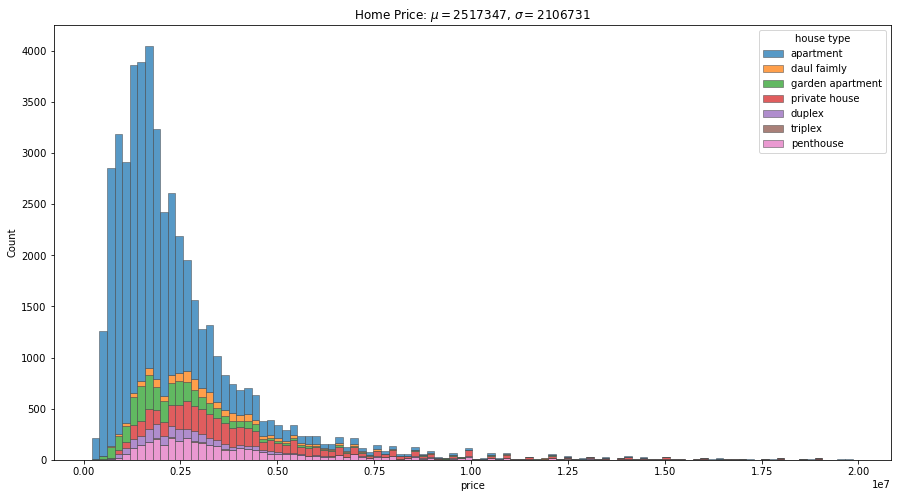

In [64]:
import matplotlib.pyplot as plt; 
import numpy as np
import seaborn as sns

plt.figure(figsize=(15,8))
sns.histplot( df, x="price", hue="house type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price'].mean()
std =  df['price'].std()
plt.title(r'Home Price: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

As you can see the mean house price is about 2,500,000 ₪ ( we are in 10^7 scale on the x axis).
We can also identify that tha vast majorty of homes cost less than 5 milion shekels.

The amount of of homes that cost 200,000 ₪ is very low as the price goes up the amount of homes increase rapidly until it picks in 2,500,000 ₪ then it decrease exponentially until there are virtualy no homes that cost more than 10 milion ( it follows log normal distribution https://en.wikipedia.org/wiki/Log-normal_distribution ).


now, lets plot the histogram of home size:

Text(0.5, 1.0, 'Home size: $\\mu=143$, $\\sigma=101$')

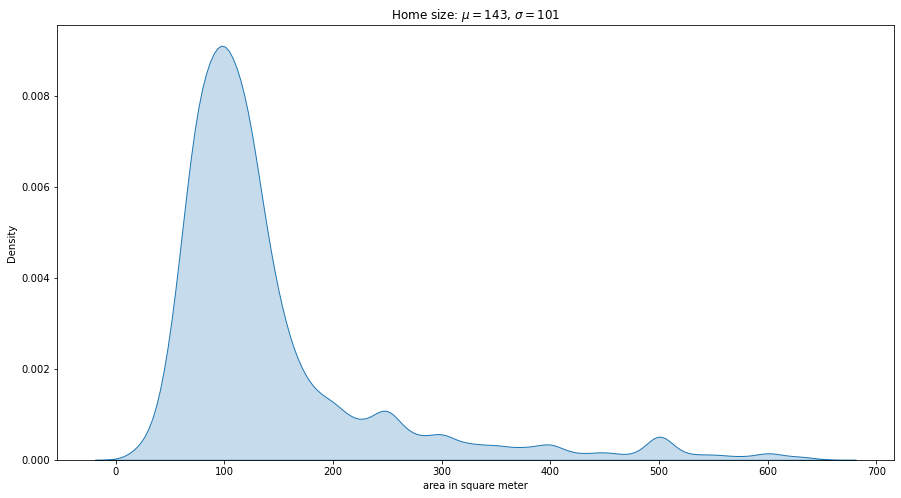

In [14]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.house_area,  shade=True)
plt.xlabel('area in square meter')

mean = df['house_area'].mean()
std =  df['house_area'].std()
plt.title(r'Home size: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

As you can see the mean house size is 143 squre meter.
The distribution is similar to Gaussian distribution with μ = 143 and σ = 101.
We can explain the spikes in the plot in the reason that most people tend to round their homes size when they are put their house for sale. 


Lets draw plot that shows the correlation between home size and home pirce.

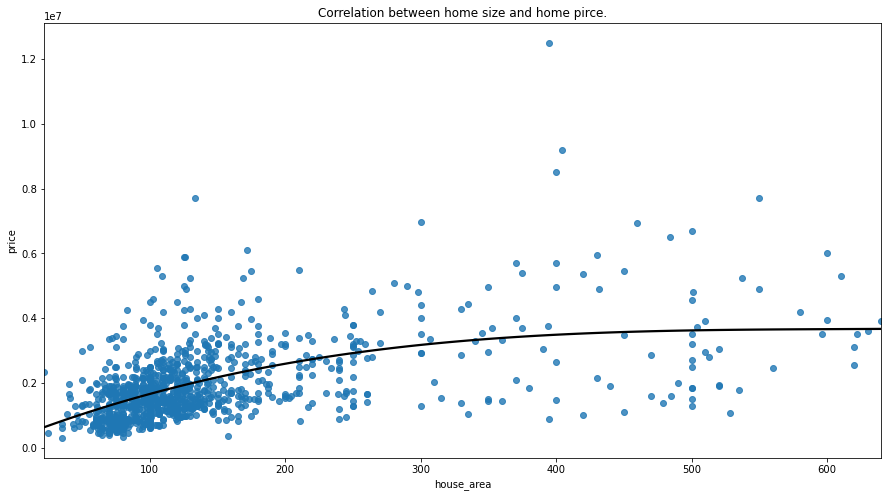

In [22]:
plt.figure(figsize=(15,8))

plt.title('Correlation between home size and home pirce.')
df_temp = df.head(1000)

ax = sns.regplot(x="house_area", y="price", data=df_temp, 
                 line_kws={"color": "black"},
                 order=3, ci=None)


As you can see when the house area is small than increase in the size correlate strongly with increase in price but as the area becomes bigger the affect fades away and when the area hits 400 square meters we can see almost no correlation between home size and home pirce.

Now it will be intersting to see whether bigger homes are cost more per squre meter than small homes in regard to different house tpyes, we gonna drop the apartments from the data set in oreder to see the other homes types more clearly.

<AxesSubplot:xlabel='house_area', ylabel='price_per_squre_meter'>

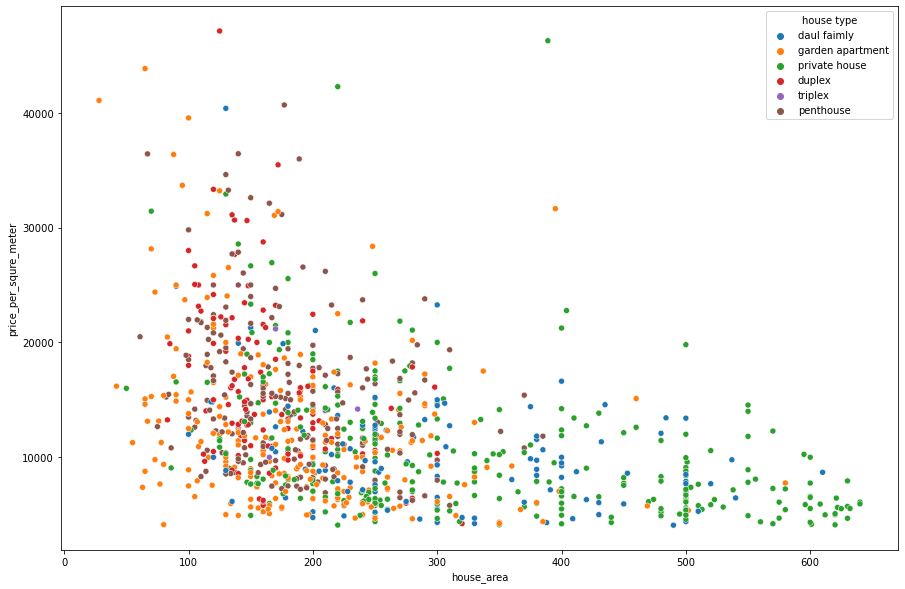

In [71]:
df_temp = df.where(df["house type"] != "apartment" ).dropna()
df_temp = df.where(df_temp["price_per_square_meter"] < 50000 ).dropna()
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_temp.head(1000), x="house_area", y="price_per_squre_meter",hue="house type")

Surprisingly we can see from the plot that bigger homes tend to cost less per square meter than small homes.

Okay, how does size correlate with rooms number?

Text(0.5, 1.0, 'frequency of homes by area and number of rooms.')

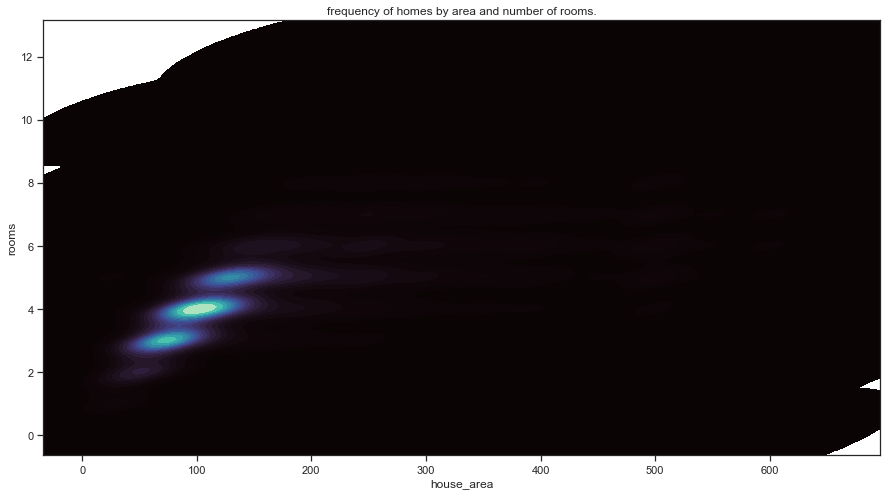

In [34]:
plt.figure(figsize=(15,8))
sns.kdeplot(
    data=df,  x="house_area",  y="rooms",
    fill=True, thresh=0, levels=20, cmap="mako",
)

plt.title('frequency of homes by area and number of rooms.')

We can learn few of things from this plot, but first we have to understand what the plot means:

Brighter colour stands for more common accurence ( for example we can see that 4 room  100 square meter homes is the brighest point in the plot).

First almost all the homes are betweem 2 and 6 rooms and betweem 30 to 250 square meter, seconds we can see almost linear correlation between the area of the house and it number of rooms (in fact correlation of 0.64 ), on top of that for each room number the varition of area is about 50 squere meters ( if you now that the home contains 4 rooms you can say confidently that the size of the house is around 70 to 170 square meters ). 



Lets look on the connection between house size the number of rooms in the hous and his price:

Text(0.5, 0.92, 'Correlation between home size, number of rooms and pirce.')

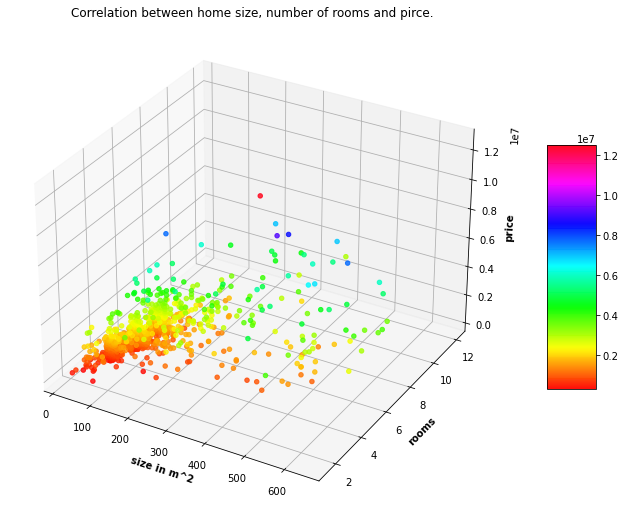

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (18, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('hsv')

x = df_temp["house_area"]
y = df_temp["rooms"]
z = df_temp["price"]
sctt = ax.scatter3D(x, y, z, cmap = my_cmap, c = z ,alpha = 0.8 )


ax.set_xlabel('size in m^2', fontweight ='bold')
ax.set_ylabel('rooms', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between home size, number of rooms and pirce.')

As we can see there is strong correlation between the 3 varibales ( 0.47 between size and price, 0.42 between number of rooms and price and 0.64 between size and number of rooms).

lest draw a pie chart that describes the distribution of different house types

Text(0.5, 1.0, 'Distribution of different house types')

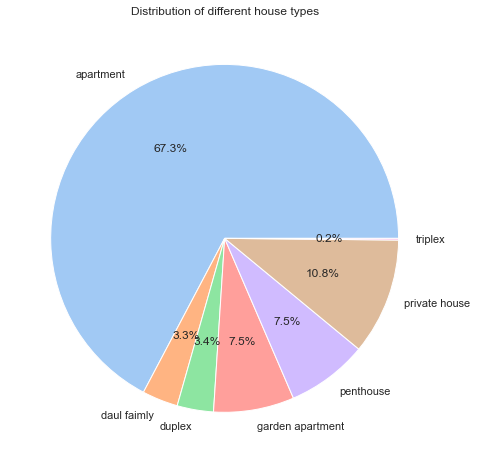

In [37]:
data = df.groupby("house type").count()
labels  = data.index.values.tolist()
data_list =  data['city'].tolist()

plt.figure(figsize=(15,8))
plt.pie(data_list, labels = labels, autopct='%.1f%%')
plt.title('Distribution of different house types')

We can learn from this chart that the vast majorty of homes up to sale are apartments (67.3%) in the second place by a large margin are private homes (10.8%) and we have a tie in the third place where gardan apartments and penthouse take each 7.5% of the market share.

as you can see the seaborn library does not handle the hebrew language very well,
hence we will replace all the hebew text in the 'house type' coulmn with plain english and then run the code again.

now it will be nice to see whether having elevator in your apartment affect the price of the apartment.

but first we have to sort out all the homes that not qualified as apartmens

Text(0.5, 1.0, 'Affect of elevator on aparments and penthouse prices')

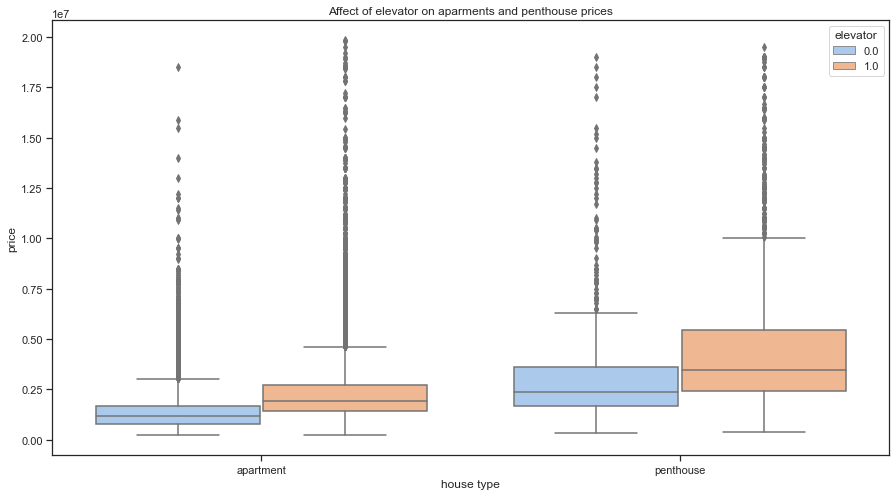

In [38]:
# filter where lift does matter  
apartment = df["house type"] == "apartment"
penthouse = df["house type"] == "penthouse"
apartments = df.where(apartment | penthouse ).dropna()

# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="house type", y="price",  hue="elevator", data=apartments)
plt.title('Affect of elevator on aparments and penthouse prices')

Lets explain how does box plot works: the line in the middle of the rectangle stands for the median velue, the upper edge of the rect stands for 75% and the lower edge stands for the 25'st precentile.
the upper bound stands for 2 standard devations from the mean ( 97.8% ) and the lower bound is for 2 standard devations down from the mean (2.2%) all the rest of the dots are outliers.

It is clear from the plot that exsiting of an elevator in the building corolate positivly with homes price,
we can see that apartments with elevator cost 0.5 million ₪ more the apartments without an elevator, and if look in penthouse the margin increase to about 1 million ₪.

in fact its make a lot of sence, in which apartment would you prefer to live apartment with an elevator of one without?

now lets look what about different house types with and without furniture:

Text(0.5, 1.0, 'Affect of furniture on different house types prices')

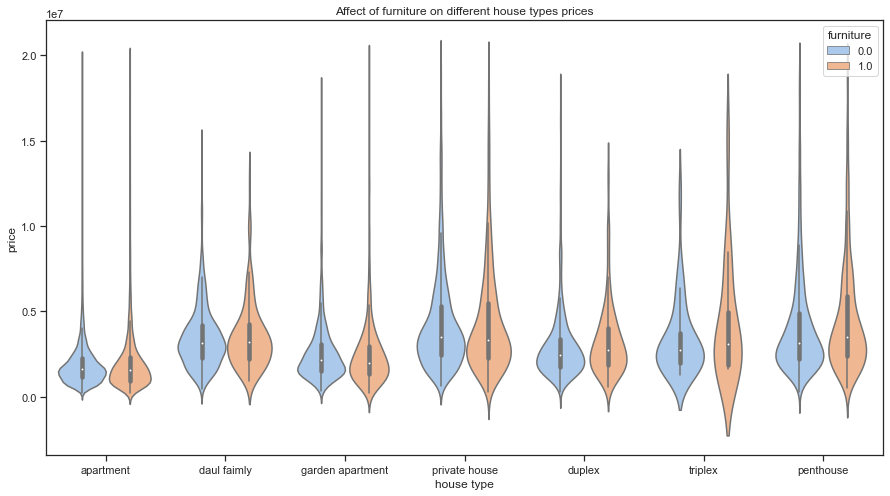

In [39]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="house type", y="price",  hue="furniture", data=df)
plt.title('Affect of furniture on different house types prices')

Violin plot is similar in all sense to box plot, but in addition we can see the frequency of the Y axis ( price in our plot).

It is clear from the plot thatt here is no clear visible correlation between absence of furniture in the house and it price (it is ture in regard to all the house types in data set).

Lastly, what about having protected room in the house, does it affect the price of your home?

<AxesSubplot:xlabel='house type', ylabel='price'>

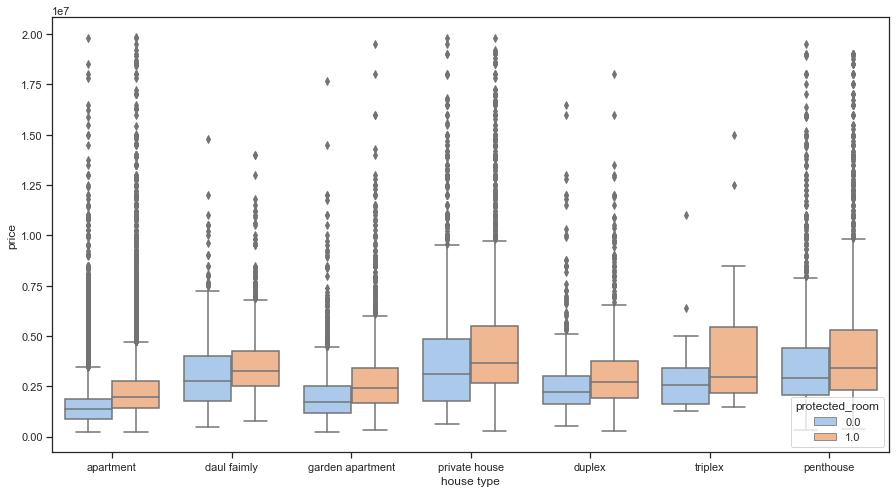

In [41]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="house type", y="price",  hue="protected_room", data=df)

Now we can see clearly it is true in all cases that having protected room in the house corrolate positivly with the price of the house.

Lets look on the joint plot of price and garden area in private homes and gardan apartments:

C:\Users\Ronald\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


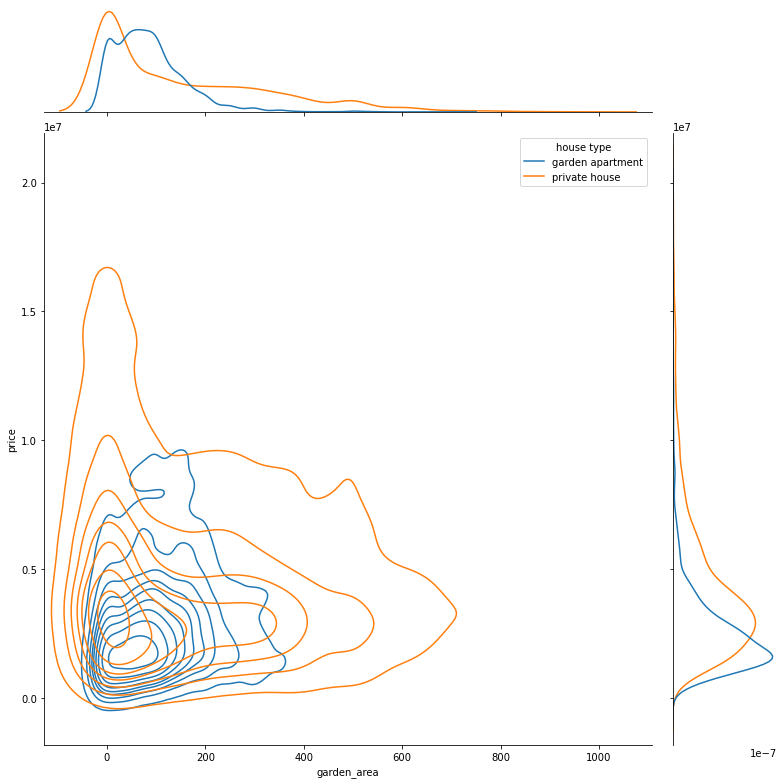

In [23]:
types_to_keep = ['private house', "garden apartment"]
homes_with_garden = df[df['house type'].isin(types_to_keep)]

sns.jointplot(data=homes_with_garden, x="garden_area",  y="price", hue="house type", kind="kde",
              height=11, aspect=11.7/8.27)

We can see no signficate correlation between garden area and price, homes with larger garden tend to be a little bit more expensive than home with smaller garden both whan looking gardan aparments and private homes.

We can also learn that private homes has much more veraiton in the gardan area than garden apartments, but all in all if we look on the average garden area it almost identical between the 2 catgories.


## Finding Correlations
We mentioned the word correlation several times so far but we not yet looked on the correlation matrix.
lets found the correlations of the numeric values in our data set:

before we find correlation we have to drop the 'price per square meter' coulmn because it does not an independent varibale.

<AxesSubplot:>

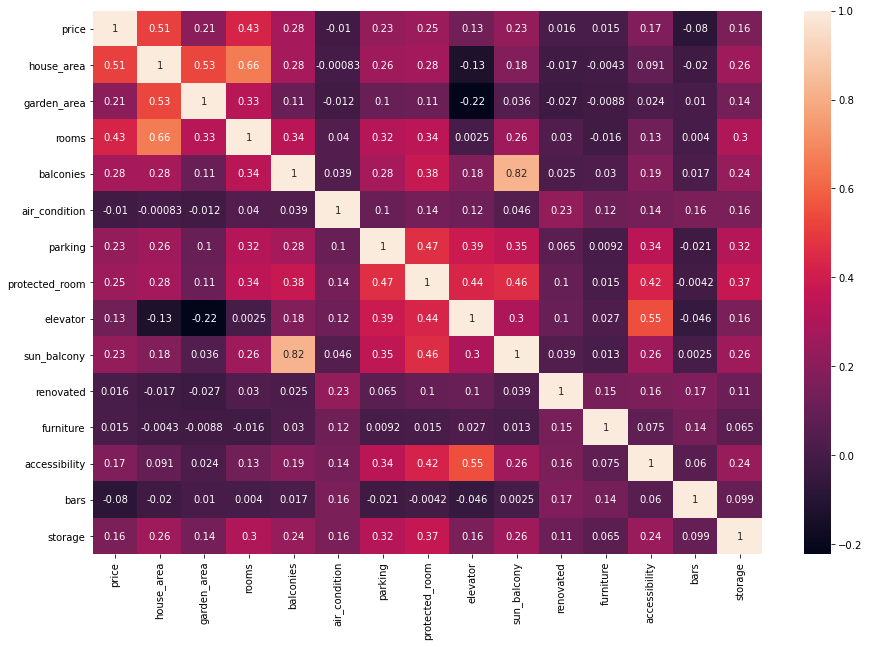

In [75]:
df = df.drop(['price_per_squre_meter'], axis=1)


corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

As you can see the highest correlation between price and other numeric parmater is area. but still correlation of 0.51 is consiederd quite strong correlation,but area alone does not disclose the full pictue so how we explain this?

As we already said we only took into calculation the numeric parmaters, but 'city' and 'neighborhood' are not numeric and we know that they are among the crucial parmaters when determing house price.

###  Back to visiulistion
In order to to observe how the city affect on the other varibles we have to isolate the city attirbue because ther are to many different cities in out dataset(380).
lets look on the 10 most frequent cities to apear in our data set

In [31]:
ten_most_popular_cities = df['city'].value_counts().index.tolist()[0:10]
ten_most_popular_cities

['Tel Aviv Jaffa',
 'Jerusalem',
 'Haifa',
 'Beer Sheva',
 'Netanya',
 'Ashdod',
 'Rishon Lezion',
 'Ashkelon',
 'Petah Tiqwa',
 'Ramat Gan']

now lets build new data frame consists only of the most popular cities

In [32]:
df_popular_cities = df[df['city'].isin(ten_most_popular_cities)]

df_popular_cities 

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
3,Ashdod,רובע ב,1040000.0,apartment,70.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Tel Aviv Jaffa,צפון יפו,3450000.0,apartment,75.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
12,Rishon Lezion,רמז,2990000.0,duplex,135.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13,Petah Tiqwa,משכנות גנים וקרית הרב סלומון,1850000.0,apartment,110.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
14,Ramat Gan,הבורסה,3250000.0,apartment,108.0,0.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57584,Ashdod,רובע א,1700000.0,apartment,107.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
57586,Petah Tiqwa,כפר גנים א,2100000.0,apartment,120.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
57587,Ashdod,סיטי,2600000.0,duplex,190.0,0.0,5.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
57591,Ashdod,רובע ב,980000.0,apartment,48.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


lets see what is the average home price in each city

Text(0.5, 1.0, 'average price by city')

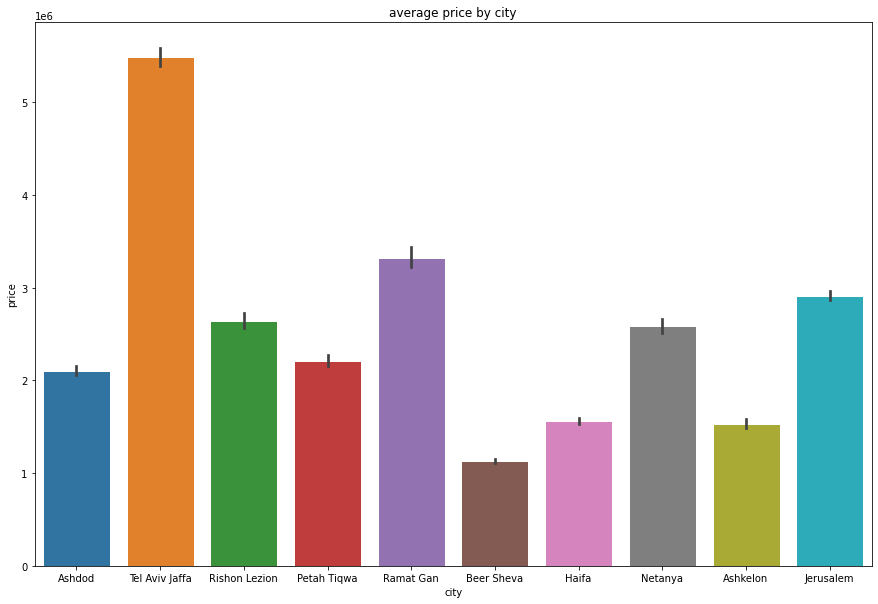

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'price' , data = df_popular_cities, edgecolor = 'w').set_title('average price by city')


we can see that the average price of house in the mose expensive city tel aviv the is almost 5.5 milion shekels.
while the price in the cheapest city in our list (beer shave) is around 1.1 milion shekels.

Now lets look on average price for squre meter by city and house type.
for this we first have to find the average price and the average size for each city.

Text(0.5, 1.0, 'average price for squre meter by city and house type')

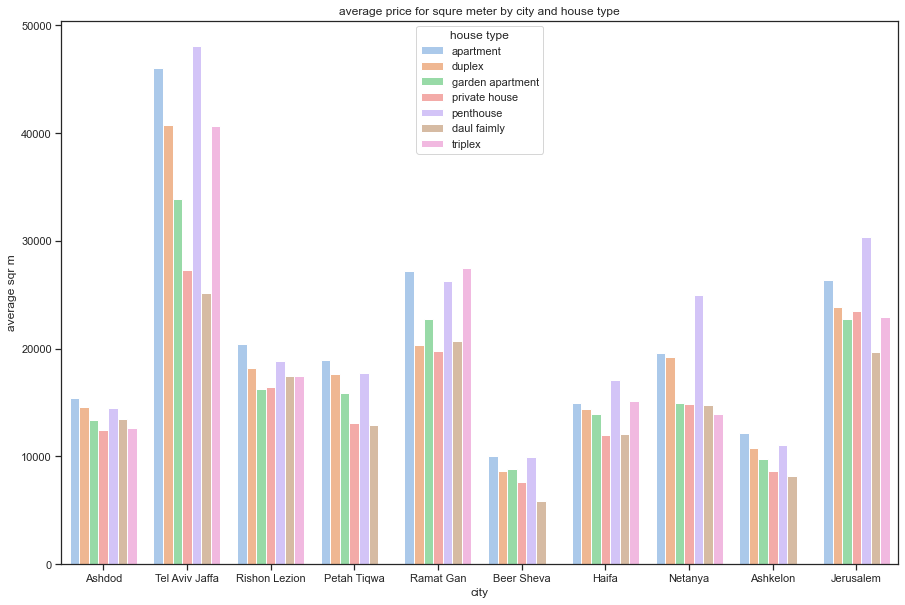

In [50]:
#founfing average size and average price
average_area = df_popular_cities.groupby(['city','house type'])["house_area"].mean()
average_area = average_area.to_frame()
average_area.columns = ['average area']

average_price = df_popular_cities.groupby(['city','house type'])["price"].mean()
average_price = average_price.to_frame()
average_price.columns = ['average price']

# merging
df_avg = pd.merge(average_price,average_area,on=['city','house type'])
df_popular_cities = pd.merge(df_popular_cities, df_avg, on=['city','house type'])
df_popular_cities["average sqr m"] =df_popular_cities["average price"] / df_popular_cities["average area"]

#ploting
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'average sqr m' , hue = "house type", data = df_popular_cities, edgecolor = 'w').set_title('average price for squre meter by city and house type')

The most expensive homes in price per square meter are penthouse in tel aviv ( 48,000 shekel for meter ) and the cheapest homes are dual faimly homes in beer sheva ( 6000 shekels per square meter ).

It is inetesing to see that in all the cities penthouse are among the more expensive homes while dual fimaly are among the cheapest home in price per square meter.

we know that parking is scarce in tel aviv, can we see it in our data?

Text(0, 0.5, 'Relative frequency')

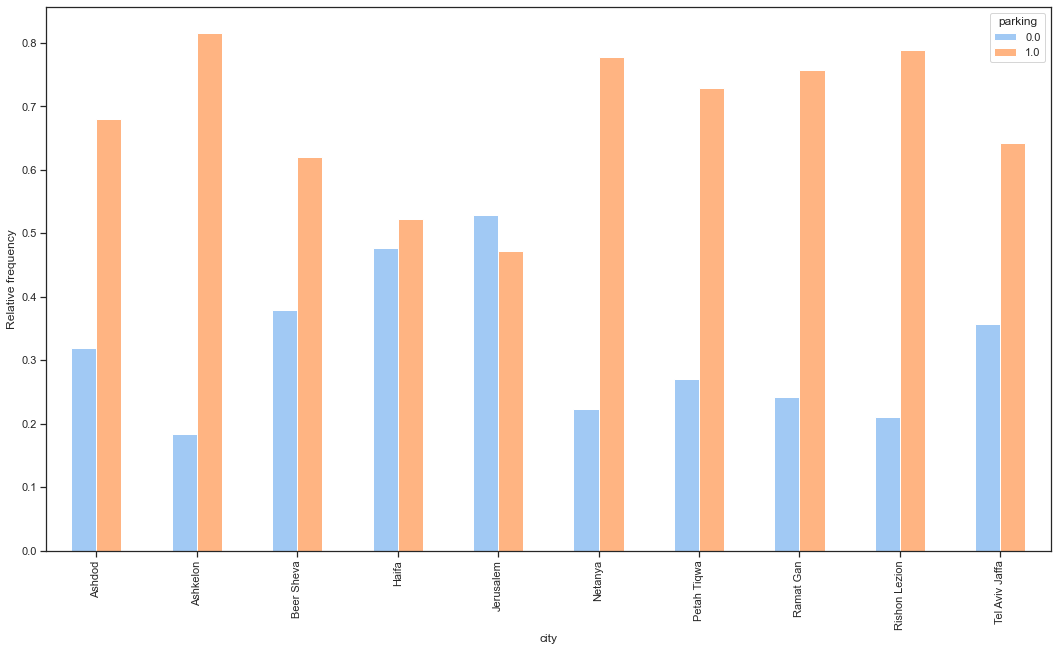

In [51]:
cross_tab =  pd.crosstab(df_popular_cities["city"], df_popular_cities["parking"], normalize ='index' )
cross_tab.plot(kind = 'bar', figsize=(18, 10))
plt.ylabel("Relative frequency")

Surprisingly only 35% of homes for sale in Tel Aviv does not have parking (we expected for more homes without parking), the highest precentage for homes without parking found  in jurasalem (53%).

now, lets look how having an air condition in your house its price:

<AxesSubplot:xlabel='city', ylabel='price'>

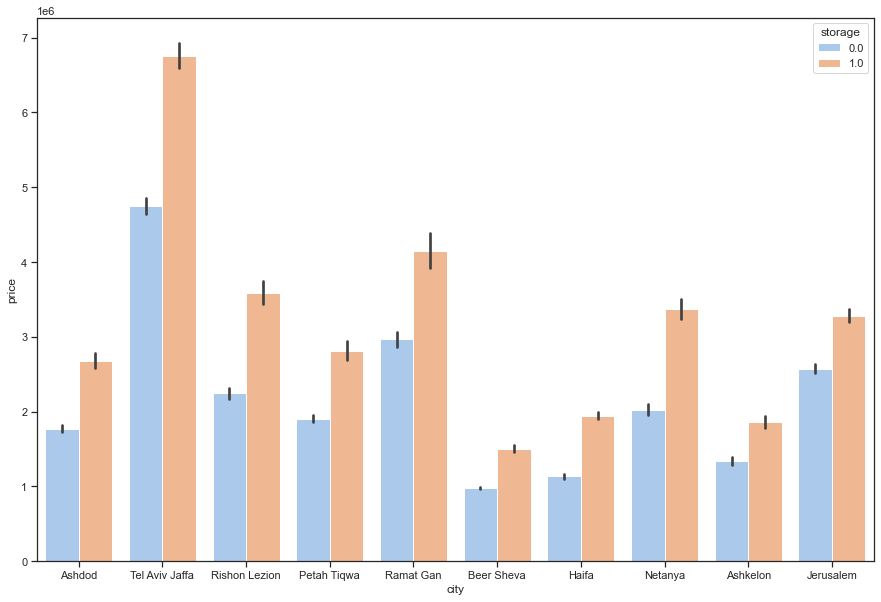

In [52]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'price', hue ='storage', data = df_popular_cities, edgecolor = 'w')

It seems that homes with out an air condition tend to be about 25% cheaper than homes an with air condition installed, this can be seen across all cities.

lastly, lets look on disterbution of house types in different cities by price

C:\Users\Ronald\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

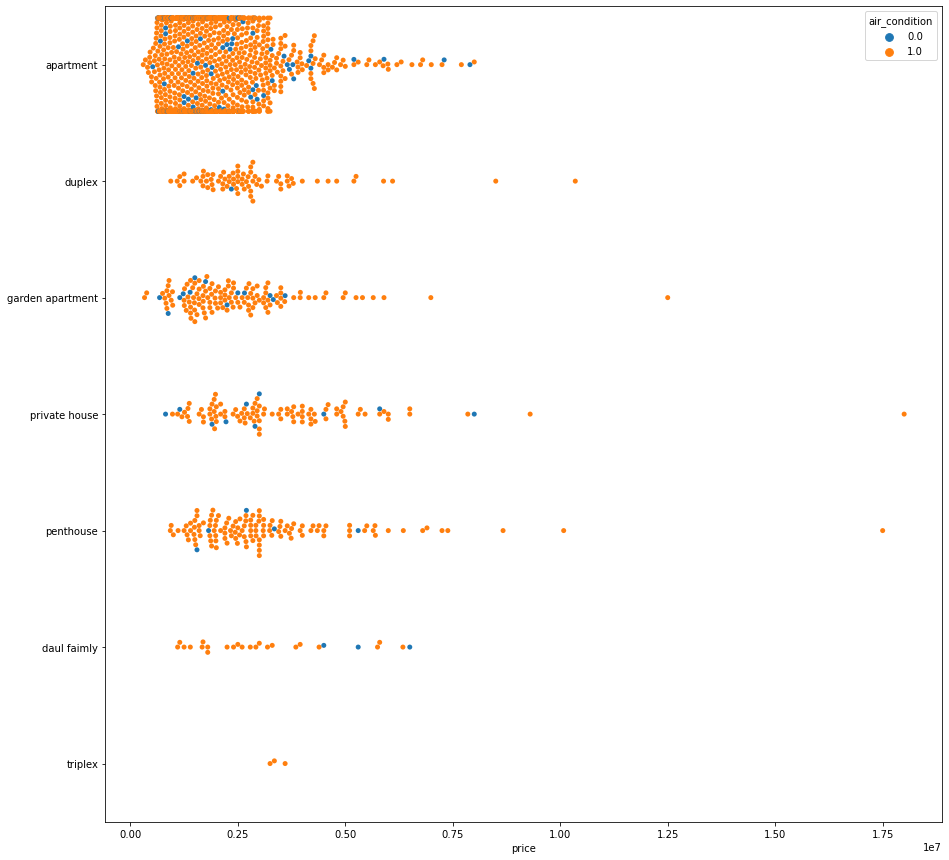

In [30]:
plt.figure(figsize=(15, 15))
temp_df = df_popular_cities.head(2000)
ax = sns.swarmplot(data=temp_df, x="price", y="house type", hue="air_condition")
ax.set(ylabel="")

There is no clear classifaction to homes with or without air condition, exsit many cheap homes with air conditon and on the contrary there are many expensive homes that does not contain air condition.

Lets look on neigberhoods in order to do this we naturaly have to look on specific city so we going to choose the most popular city in our data set : Tel Aviv.

In [28]:
tel_aviv = df.where( df["city"] == "Tel Aviv Jaffa").dropna()
ten_most_popular_hoods = tel_aviv['neighborhood'].value_counts().index.tolist()[0:10]
tel_aviv_popular_hoods = tel_aviv[tel_aviv['neighborhood'].isin(ten_most_popular_hoods)]
tel_aviv_popular_hoods

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
279,Tel Aviv Jaffa,הקריה,3000000.0,apartment,50.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
319,Tel Aviv Jaffa,רמת אביב ג,3950000.0,apartment,95.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
547,Tel Aviv Jaffa,הקריה,4600000.0,apartment,102.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
761,Tel Aviv Jaffa,הצפון החדש סביבת ככר המדינה,5550000.0,apartment,105.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
891,Tel Aviv Jaffa,הצפון הישן החלק הצפוני,3100000.0,apartment,56.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57498,Tel Aviv Jaffa,הצפון הישן החלק המרכזי,3500000.0,apartment,58.0,0.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
57516,Tel Aviv Jaffa,לב תל אביב החלק הצפוני,5950000.0,apartment,135.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57540,Tel Aviv Jaffa,הצפון החדש סביבת ככר המדינה,2150000.0,apartment,52.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
57546,Tel Aviv Jaffa,הצפון החדש סביבת ככר המדינה,5950000.0,private house,316.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have 2130 rows, but the neigborhoods appear in hebrew so lets translate them into english.

then lets show the avarge price in each neigborhood in tel aviv:

In [33]:
# translate fro, hebrew to english the neigberhoods names
ten_most_popular_hoods 

translator = Translator()
neigborhoods_english = []

for neigborhood in ten_most_popular_hoods:
    neigborhood_english = translator.translate(neigborhood, src='he', dest='en')
    neigborhoods_english.append(neigborhood_english.text)
    
tel_aviv_popular_hoods = tel_aviv_popular_hoods.replace(to_replace = ten_most_popular_hoods, value = neigborhoods_english)

Text(0.5, 1.0, 'average price by city')

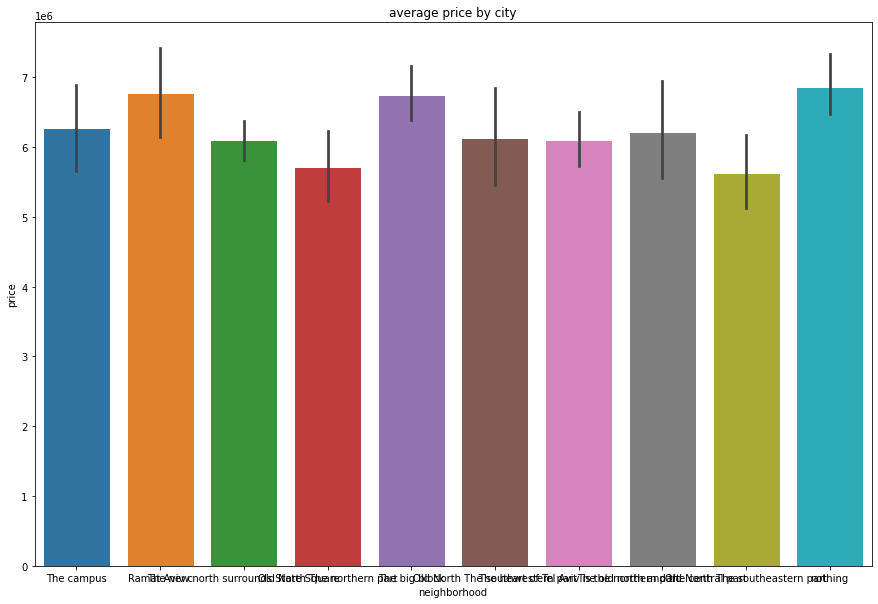

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'neighborhood', y = 'price', data = tel_aviv_popular_hoods, edgecolor = 'w').set_title('average price by city')

As you can see Tel aviv is expensive across the board, in the cheapest neigberhood average house cost 5.6 million shekels while in the most expensive neigberhood average house cost 6.8 million.

## PCA
lets use pca to reduce the dimistion of our data set in order to simplfy  building tha AI model

# Building model for predicting house price
after we explored the data we need to solve our inital problem: classifing a house price.

in oreder to achive this we have to build machine learning model, we will try to use decision trees and linaer regresion.

first, lets drop the redundent attirbutes that we add in the previous chapter to the data set


In [202]:
df = df_popular_cities.drop(['average price', 'average sqr m', 'average area'], axis = 'columns')
df.describe()

,price,area,rooms,bars,furniture,lift
count,1.465000e+03,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,2.291408e+06,111.723549,4.006485,0.443686,0.365188,0.503754
std,1.760961e+06,60.923186,1.207668,0.496988,0.481647,0.500157
min,2.150000e+05,16.000000,1.000000,0.000000,0.000000,0.000000
25%,1.400000e+06,78.000000,3.000000,0.000000,0.000000,0.000000
50%,1.840000e+06,100.000000,4.000000,0.000000,0.000000,1.000000
75%,2.600000e+06,124.000000,5.000000,1.000000,1.000000,1.000000
max,1.900000e+07,600.000000,10.000000,1.000000,1.000000,1.000000


We will now deal with price and area attributes, that the values of these two attributes are consecutive numbers, so we will divide them into intervals, according to the frequency graphs we presented above.

In [203]:
df['price_n'] = pd.cut(df['price'], 100)
df['price_n'] = pd.cut(df['price'],[0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,6000000,10000000,20000000,100000000], labels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,6000,10000,20000,100000])
df= df.dropna()
df['price_n'].value_counts()
df

,city,price,area,house type,rooms,bars,furniture,lift,parking,air condition,price_n
0,Ramat Gan,2790000.0,90.0,dual faimly,4.0,1.0,0.0,0.0,shared parking,in all the rooms,3000
1,Ramat Gan,2800000.0,90.0,dual faimly,4.0,1.0,0.0,0.0,shared parking,in all the rooms,3000
2,Ramat Gan,4480000.0,140.0,dual faimly,4.0,0.0,0.0,0.0,private-outdoor,in all the rooms,4500
3,Ramat Gan,6600000.0,390.0,dual faimly,6.5,1.0,1.0,0.0,private-outdoor,central,10000
4,Ramat Gan,5600000.0,90.0,dual faimly,4.0,0.0,0.0,0.0,non,non,6000
...,...,...,...,...,...,...,...,...,...,...,...
1460,Ashkelon,5500000.0,493.0,villa,10.0,0.0,0.0,0.0,private-outdoor,in all the rooms,6000
1461,Netanya,1750000.0,202.0,roof apartment,5.0,0.0,1.0,1.0,private-indoor,central,2000
1462,Ramat Gan,5400000.0,210.0,villa,6.5,1.0,0.0,0.0,private-indoor,central,6000
1463,Petah Tiqwa,2600000.0,140.0,cottage,5.0,1.0,1.0,0.0,non,in the bedrooms,3000


now lets convert the area attribute from continuous value into discrit value

In [204]:
df['area_n'] = pd.cut(df['area'],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,300,400,700], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
df = df.dropna()
df

,city,price,area,house type,rooms,bars,furniture,lift,parking,air condition,price_n,area_n
0,Ramat Gan,2790000.0,90.0,dual faimly,4.0,1.0,0.0,0.0,shared parking,in all the rooms,3000,8
1,Ramat Gan,2800000.0,90.0,dual faimly,4.0,1.0,0.0,0.0,shared parking,in all the rooms,3000,8
2,Ramat Gan,4480000.0,140.0,dual faimly,4.0,0.0,0.0,0.0,private-outdoor,in all the rooms,4500,13
3,Ramat Gan,6600000.0,390.0,dual faimly,6.5,1.0,1.0,0.0,private-outdoor,central,10000,26
4,Ramat Gan,5600000.0,90.0,dual faimly,4.0,0.0,0.0,0.0,non,non,6000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Ashkelon,5500000.0,493.0,villa,10.0,0.0,0.0,0.0,private-outdoor,in all the rooms,6000,27
1461,Netanya,1750000.0,202.0,roof apartment,5.0,0.0,1.0,1.0,private-indoor,central,2000,20
1462,Ramat Gan,5400000.0,210.0,villa,6.5,1.0,0.0,0.0,private-indoor,central,6000,20
1463,Petah Tiqwa,2600000.0,140.0,cottage,5.0,1.0,1.0,0.0,non,in the bedrooms,3000,13


We will now split the data set into the classified properties, and the target variable

In [205]:
inputs = df.drop(['price','price_n','area'],axis = 'columns')
target = df['price_n']
target = target.to_frame()

We will replace the categorical variables with numeric variables  using the indexing method

In [206]:
from sklearn.preprocessing import LabelEncoder
le_city = LabelEncoder()
le_type = LabelEncoder()
le_parking = LabelEncoder()
le_air = LabelEncoder()

inputs['city_n'] = le_city.fit_transform(inputs['city'])
inputs['type_n'] = le_type.fit_transform(inputs['house type'])
inputs['parking_n'] = le_parking.fit_transform(inputs['parking'])
inputs['air_n'] = le_air.fit_transform(inputs['air condition'])

inputs

,city,house type,rooms,bars,furniture,lift,parking,air condition,area_n,city_n,type_n,parking_n,air_n
0,Ramat Gan,dual faimly,4.0,1.0,0.0,0.0,shared parking,in all the rooms,8,7,2,6,1
1,Ramat Gan,dual faimly,4.0,1.0,0.0,0.0,shared parking,in all the rooms,8,7,2,6,1
2,Ramat Gan,dual faimly,4.0,0.0,0.0,0.0,private-outdoor,in all the rooms,13,7,2,4,1
3,Ramat Gan,dual faimly,6.5,1.0,1.0,0.0,private-outdoor,central,26,7,2,4,0
4,Ramat Gan,dual faimly,4.0,0.0,0.0,0.0,non,non,8,7,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Ashkelon,villa,10.0,0.0,0.0,0.0,private-outdoor,in all the rooms,27,0,8,4,1
1461,Netanya,roof apartment,5.0,0.0,1.0,1.0,private-indoor,central,20,5,7,3,0
1462,Ramat Gan,villa,6.5,1.0,0.0,0.0,private-indoor,central,20,7,8,3,0
1463,Petah Tiqwa,cottage,5.0,1.0,1.0,0.0,non,in the bedrooms,13,6,1,1,2


again, we will get rid from the redundant attributes

after that we will be left with only numeric values in our data set

In [207]:
inputs_n = inputs.drop(['city','house type','parking','air condition'],axis = 'columns')
inputs_n

,rooms,bars,furniture,lift,area_n,city_n,type_n,parking_n,air_n
0,4.0,1.0,0.0,0.0,8,7,2,6,1
1,4.0,1.0,0.0,0.0,8,7,2,6,1
2,4.0,0.0,0.0,0.0,13,7,2,4,1
3,6.5,1.0,1.0,0.0,26,7,2,4,0
4,4.0,0.0,0.0,0.0,8,7,2,1,5
...,...,...,...,...,...,...,...,...,...
1460,10.0,0.0,0.0,0.0,27,0,8,4,1
1461,5.0,0.0,1.0,1.0,20,5,7,3,0
1462,6.5,1.0,0.0,0.0,20,7,8,3,0
1463,5.0,1.0,1.0,0.0,13,6,1,1,2


In [208]:
lcity = [12, 13,  2,  1,  5, 11,  9, 10,  7,  3,  8,  6,  4,  0]
ltype = [ 1,  0,  2,  3,  4, 11,  5,  7, 10,  9,  8,  6]
llift = [0, 1]
lbars = [0, 1]
lroom = [ 4. ,  6. ,  2.5,  3. ,  5. ,  2. ,  1. ,  4.5,  3.5,  1.5,  7. , 6.5,  5.5, 10. ,  8. ,  9. ]
lfun = [0, 1]
lpark = [2, 0, 4, 1, 5, 6, 3]
lair = [2, 1, 0, 5, 3, 4, 6]
lprice = ['500','1000','1500','2000','2500','3000','3500','4000','4500','5000','6000','10000','20000','100000']

feature_names=[lroom,lbars, lfun, llift, lcity, ltype ,lpark,lair] 

## Training the model
we will import the DecisionTreeClassifier class from sklearn and then train the model.
lets start with simple tree that has a max depth of 2

In [209]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
model = model.fit(inputs_n, target)

model.score(inputs_n, target)

0.36450511945392494

as you can see, the tree classifies only 31% of the data set correctly

now, lets graph the tree:

In [210]:
text_representation = tree.export_text(model)
text_representation

'|--- feature_5 <= 2.50\n|   |--- feature_4 <= 10.50\n|   |   |--- class: 1000\n|   |--- feature_4 >  10.50\n|   |   |--- class: 1500\n|--- feature_5 >  2.50\n|   |--- feature_4 <= 9.50\n|   |   |--- class: 2000\n|   |--- feature_4 >  9.50\n|   |   |--- class: 2500\n'

its hard to get grasp of what is going on from this repersention,
so we will use the the graphviz labriry instead.

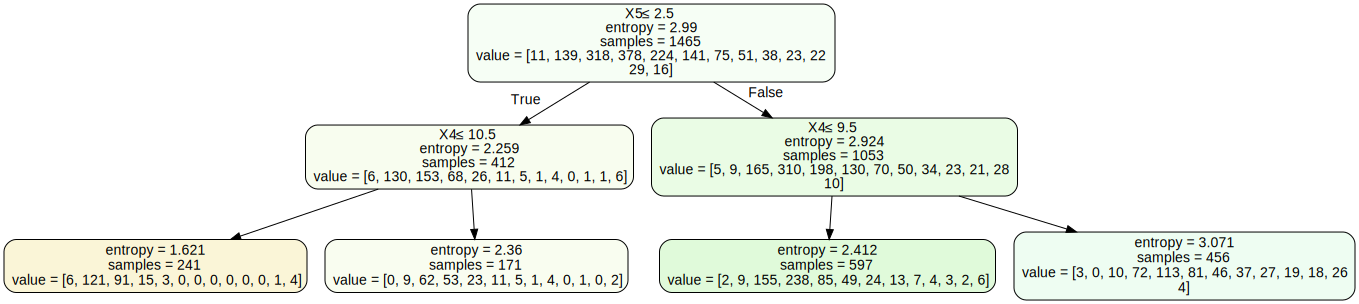

In [211]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True, 
special_characters=True)
graph = graphviz.Source(dot_data)
graph

lets see what happens if not specify max depth for the tree

In [212]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model = model.fit(inputs_n, target)

model.score(inputs_n, target)

0.9720136518771331

97.1%, we could say its quite better than 31%.
but we only test the training set, that is not quite fair

## Testing different models

now lets see how our tree performs on the testing set

In [213]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

x_train, x_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.1,random_state=0)

modell = tree.DecisionTreeClassifier(criterion='entropy')
modell = modell.fit(x_train, y_train)
modell.score(x_test, y_test)

0.3673469387755102

35.4% accuracy, not so impresive...

lets try regresion in decision tree

In [214]:
from sklearn import metrics

dt = DecisionTreeRegressor(min_samples_leaf=0.1,random_state=0)
y_tr = y_train['price_n']
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
metrics.r2_score(y_test,y_pred)

dt.score(x_test,y_test)

0.128938040889239

tha accuracy in the regresion method is even worse,

what about cross validtion algorithm?

In [215]:
from sklearn.model_selection import cross_val_score

across = cross_val_score(modell,inputs_n, target,cv=20)
across.mean()

C:\Users\ronen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


0.35096260644205846

37% a little bit better than our original tree

lastly, lets try  decision Tree forest, maybe it will help us to overcome the overfiting in our model

In [216]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion= 'entropy')

rf.fit(x_train, y_train)
rf.score(x_test, y_test)

<ipython-input-216-48701bcfb5b5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


0.47619047619047616

yes!!!, not a great sucsess but 46.9% is quite of improvment compare to our 35.4 oringal accuracy

lets see what parametes causes the increase in accuracy of the forest algorithm

In [217]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2,3,4,5]
for f,d in product(max_features,max_depths):
        rf = RandomForestClassifier(n_estimators = n_estimators,
                                    criterion= 'entropy',
                                    max_features=f,
                                    max_depth= d,
                                    n_jobs =2,
                                    random_state=1337
                                )
        rf.fit(x_train, y_train)
        print('max_feature = {}, max_depth = {}: {:.3f}'.format(f,d,rf.score(x_test, y_test)))

<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = 1, max_depth = None: 0.388


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = 1, max_depth = 2: 0.333
max_feature = 1, max_depth = 3: 0.354


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = 1, max_depth = 4: 0.361
max_feature = 1, max_depth = 5: 0.381


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = sqrt, max_depth = None: 0.442
max_feature = sqrt, max_depth = 2: 0.327


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = sqrt, max_depth = 3: 0.422
max_feature = sqrt, max_depth = 4: 0.442


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = sqrt, max_depth = 5: 0.408


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = log2, max_depth = None: 0.442


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = log2, max_depth = 2: 0.327
max_feature = log2, max_depth = 3: 0.422


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


max_feature = log2, max_depth = 4: 0.442
max_feature = log2, max_depth = 5: 0.408


<ipython-input-217-ae0ad576dbc0>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


it seems that the parameters with the highest accuracy are:
    
max_feature = log2, max_depth = None: 0.483

or

max_feature = sqrt, max_depth = None: 0.483

#  final taughts

As we have seen we couldnt predict house price in accurecy higher than 43%, perhapse our data set is lacking some features(for instance we dont consider in our data how neighborhood or the area of the garden could affect the house price).
We believe that with more robust data we can build higher quality model.

fortunatly in these days we working on building new  data scrapper. the new scrapper produces data set that acceed the data set in this project both by volume  by veraity and numbers of features.
in the new data set there are 55,000 different homes with 18 features for each home (compare to only 4000 homes and 10 features).

hofefully with the new data we will build more precies decesion trees and even try training more models such as neural networks. 